<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Libraries-and-dataset" data-toc-modified-id="Load-Libraries-and-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Libraries and dataset</a></span></li><li><span><a href="#Visualise-Data" data-toc-modified-id="Visualise-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualise Data</a></span></li><li><span><a href="#Trim-non-contributing-data" data-toc-modified-id="Trim-non-contributing-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trim non-contributing data</a></span></li><li><span><a href="#Augmented-Dickey-Fuller-Test-to-check-if-Timeseries-is-stationary" data-toc-modified-id="Augmented-Dickey-Fuller-Test-to-check-if-Timeseries-is-stationary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Augmented Dickey-Fuller Test to check if Timeseries is stationary</a></span></li><li><span><a href="#Build-ARIMA-Model" data-toc-modified-id="Build-ARIMA-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Build ARIMA Model</a></span></li><li><span><a href="#Forcast-using-ARIMA-model" data-toc-modified-id="Forcast-using-ARIMA-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Forcast using ARIMA model</a></span></li></ul></div>

## Load Libraries and dataset

In [1]:
library('ggplot2')
library('forecast')
library('tseries')

daily_data = read.csv('Training_data.csv', header=TRUE, stringsAsFactors=FALSE)

In [2]:
head(daily_data)

serial_number,time_stamp,opening_value,highest_value,lowest_value,settle_value,volume_sell
1,2017-10-13,0.0,0.0,0.0,896.5,1212
2,2017-10-12,892.5,892.5,892.5,892.5,304
3,2017-10-11,894.0,894.0,894.0,892.5,25
4,2017-10-10,891.5,896.5,891.5,896.5,298
5,2017-10-09,0.0,0.0,0.0,885.0,188
6,2017-10-06,889.5,890.0,885.5,887.5,339


## Visualise Data

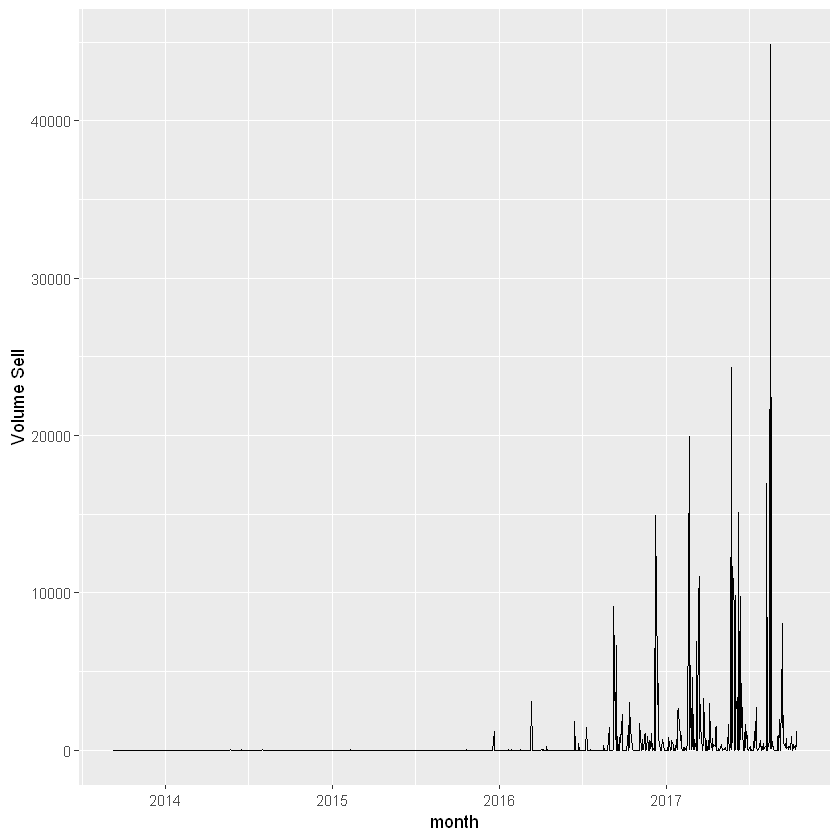

In [3]:
daily_data$Date = as.Date(daily_data$time_stamp)

ggplot(daily_data, aes(Date, daily_data$volume_sell)) + geom_line() + scale_x_date('month')  + ylab("Volume Sell") +
            xlab("")

## Trim non-contributing data

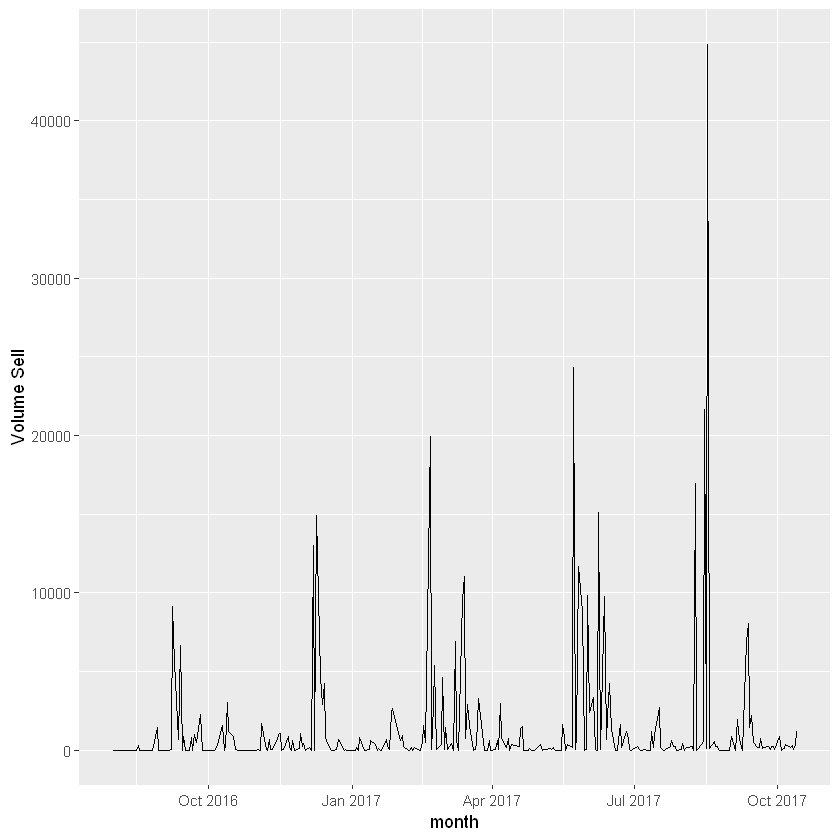

In [4]:
daily_data<-daily_data[1:310,]
daily_data$Date = as.Date(daily_data$time_stamp)

ggplot(daily_data, aes(Date, daily_data$volume_sell)) + geom_line() + scale_x_date('month')  + ylab("Volume Sell") +
            xlab("")

## Augmented Dickey-Fuller Test to check if Timeseries is stationary

In [5]:
adf_test<-adf.test(daily_data$volume_sell)
adf_test
cat("With a p-value of", as.numeric(adf_test[4]), "can accept data as", as.character(adf_test[3]))

Warning message in adf.test(daily_data$volume_sell):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  daily_data$volume_sell
Dickey-Fuller = -5.5747, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


With a p-value of 0.01 can accept data as stationary

## Build ARIMA Model

Series: pricearima 
ARIMA(1,0,2) with non-zero mean 

Coefficients:
         ar1      ma1     ma2       mean
      0.5775  -0.5883  0.2181  1309.6944
s.e.  0.1998   0.2017  0.0579   329.0256

sigma^2 estimated as 15410263:  log likelihood=-3003.27
AIC=6016.53   AICc=6016.73   BIC=6035.21

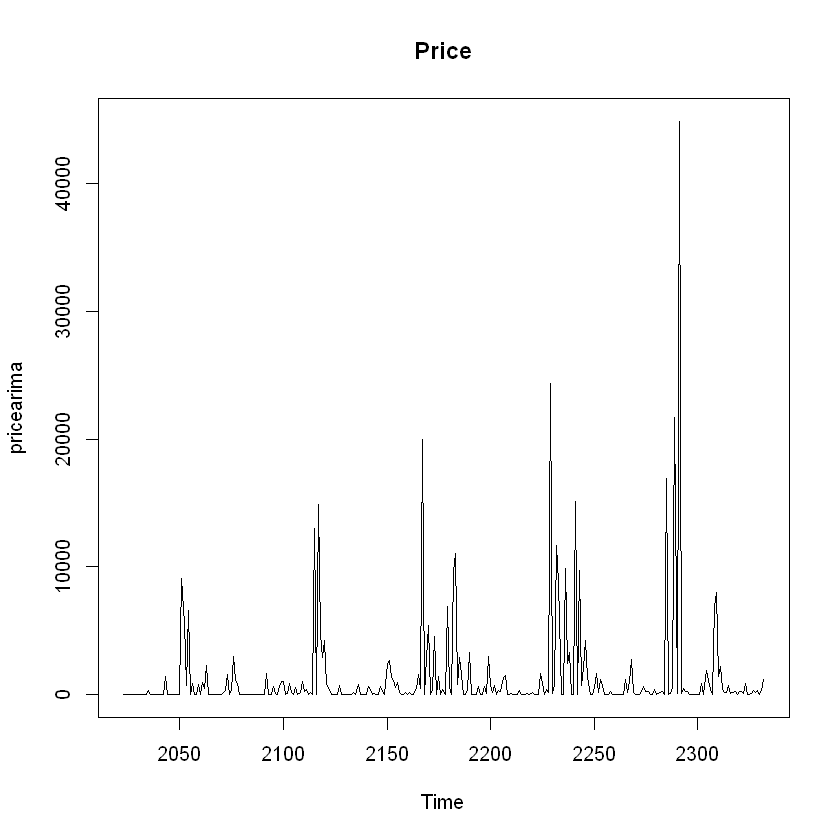

In [6]:
#Time series and auto.arima
daily_data<- daily_data[seq(dim(daily_data)[1],1),]
pricearima <- ts(daily_data$volume_sell, start = c(2016,08,01), frequency = 1)
fitlnstock<-auto.arima(pricearima)
fitlnstock
plot(pricearima,type='l')
title('Price')
#exp(lnstock)

## Forcast using ARIMA model

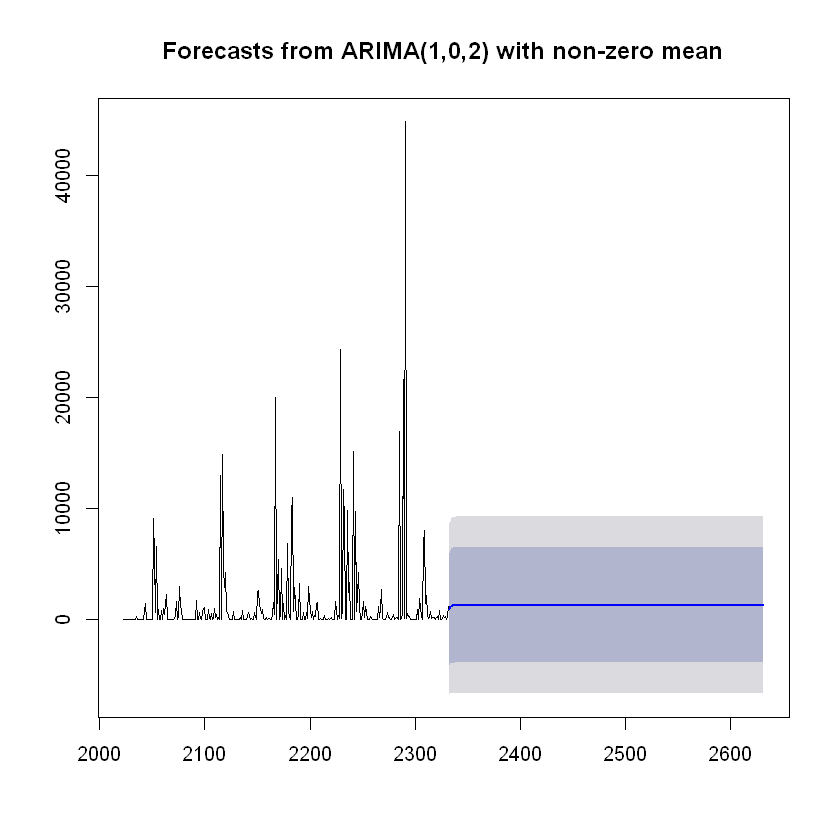

In [7]:
#Forecasted Values From ARIMA

# Forcast next 300 days (Test data of 298 and void gap of two days inbetween train and test data)
finalforecastvalues=forecast(fitlnstock,h=300)

#finalforecastvalues
plot(finalforecastvalues)

write.csv(finalforecastvalues, file = "MyData.csv") # Save prediction dataframe to file for later processing